<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:brown;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Email Spam Detection
</p>
</div>

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Task 4 Objective:-Email Spam Detection using Machine Learning.<br>

<b>Description</b><br>

💡 Spam mail, or junk mail is a type of mail that is sent to a massive number of users at once , frequently containing crytic messages, scams, or most dangerously , phising content.<br>
💡 In this task we have to use machine learning to train the spam Detector to recognize and classify emails into spam and non-spam.<br>
💡 Dataset Link:- https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset<br>
 
<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color:aliceblue;"><b> Author:- </b> Kumod Sharma</h2>
</div>

<center>
<img src="https://lh5.googleusercontent.com/srzYqxIUyKR3cpST76ri4fHxfV17bwwbMds6RHpkI0XBHkoL3gY2b5eSvHbjqa6j2Ra6kakBz2CSFkhLQwmwVHg_wY7LYxUYkrwV_ZO-RoC-fIRiJeJj2KQH7e6lmPGcz2EzL81aRIVsDRGiDzTNAbs" width=600 height=400 />
</center>

---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Importing Libraries
</p>
</div>

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)

from wordcloud import WordCloud
from collections import Counter

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Loading Datasets
</p>
</div>

In [174]:
df=pd.read_csv('C:\\Users\\kumod sharma\\Desktop\\spam.csv' , encoding = "ISO-8859-1")

In [175]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Basic Understanding of Data
</p>
</div>

### 1. Checking the dimension of the dataset.

In [176]:
df.shape

(5572, 5)

**Observation**
* From the above output we can say that there are **5572 rows/records** and **5 features**

### 2. Showing the first 5 records.

In [177]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### 3. Showing the bottom 5 records.

In [178]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


**Observation**
1. We can observe that the columns headers are not having any **meaninngful names.**
2. So we need to update those column headers with **suitable headers..**

### 4. Checking the Data-Types of the Features.

In [179]:
df.dtypes.to_frame().rename(columns={0:"Data-Types"})

,Data-Types
v1,object
v2,object
Unnamed: 2,object
Unnamed: 3,object
Unnamed: 4,object


**Observation**
* We can clearly observe that all the features present in our dataset are having **Object** data-type.
* Since all the features are having correct data-types. We don't have to do any changes.

---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Data Cleaning
</p>
</div>

### 1. Checking Total Missing Values & % of Missing Values.

In [180]:
null = df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
null["% of Missing Values"] = round(100*null["Total No. of Missing Values"]/len(df),2)
null

,Total No. of Missing Values,% of Missing Values
v1,0,0.00
v2,0,0.00
Unnamed: 2,5522,99.10
Unnamed: 3,5560,99.78
Unnamed: 4,5566,99.89


**Observation**
1. Features like **v1** & **v2** are not having a single Missing Values. So they are very useful features.
2. Other Features are having Mising values **more than 99%**. So it's better to drop those features.

### 2. Dropping Features with Missing Values.

In [181]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [182]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### 3. Renaming the Feature Names.

In [183]:
df.rename(columns={"v1":"Detection","v2":"Email Message"},inplace=True)

In [184]:
df.head()

,Detection,Email Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### 4. Checking Duplicate Values.

In [185]:
df.duplicated().sum()

403

**Observation**
* From the above output we can clearly observae that there are total **403 duplicate values/records/rows**
* So this leads to **Data lekage** in our datset which may lead to baised in our model.
* So it's better to drop those duplicate values.

### 5. Dropping Duplicate Values.

In [186]:
df.drop_duplicates(inplace=True)

In [187]:
df.shape

(5169, 2)

**Observation**
* Earlier we were having total **5572 records** after dropping duplicate values we have **5169 records**. So all the duplicate values have been dropped.

---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Exploratory Data Analysis (EDA)
</p>
</div>

### 1. Visualizing our "Detection" Feature.

In [188]:
df["Detection"].value_counts()

ham     4516
spam     653
Name: Detection, dtype: int64

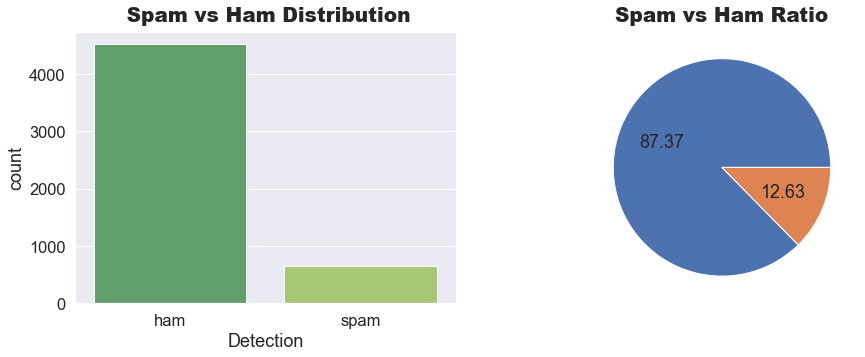

In [189]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df["Detection"],palette="summer")
plt.title(" Spam vs Ham Distribution",fontweight="black",fontsize=20,pad=10)

plt.subplot(1,2,2)
plt.pie(x=df['Detection'].value_counts(),autopct='%.2f',colors=sns.set_palette("summer"))
plt.title('Spam vs Ham Ratio',fontweight="black",fontsize=20,pad=10)
plt.show()

**Observations**
* We can clearly observe that the **Detection Feature** is **imbalanced**.
* In simple terms we can say we have **87% of Ham Records** & **13% of Spam Records**

---

### 2. Creating a Word Cloud using "Email Message" Feature for "Spam Category".

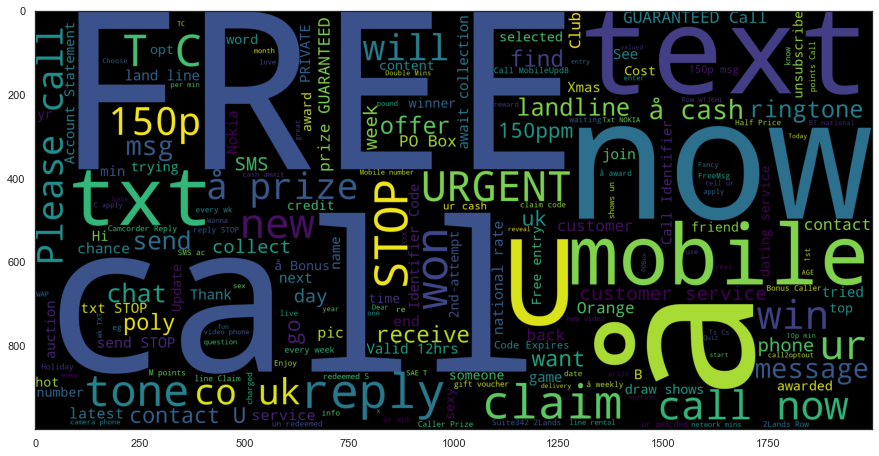

In [190]:
sns.set(style="white")
plt.figure(figsize=(15,15))
wc=WordCloud(width=2000,height=1000,background_color='black')

spam_wc=wc.generate(df[df['Detection']=='spam']['Email Message'].str.cat(sep=" "))
plt.imshow(spam_wc)
plt.show()

**Observation**
* We can clearly observe that most of the **spam email** contains worlds like:
> `Free`,`call`,`now`,`mobile`,`txt`,`text` and so on.

---

### 2. Creating a Word Cloud using "Email Message" Feature for "Ham Category".

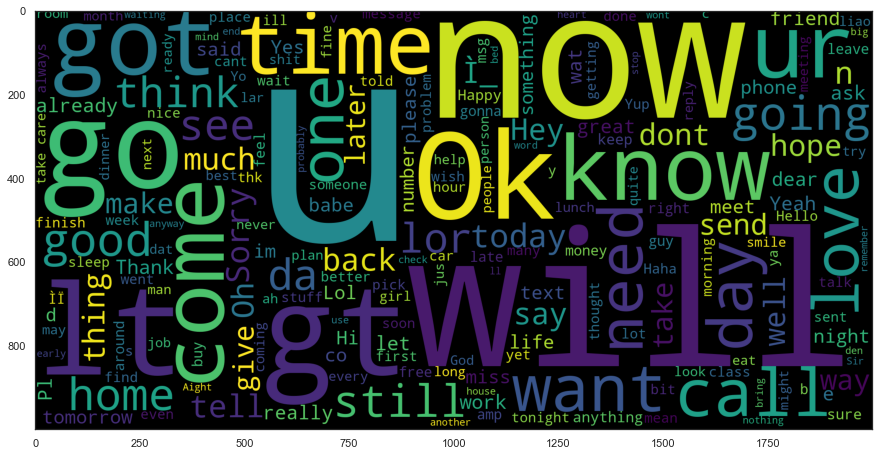

In [191]:
sns.set(style="white")
plt.figure(figsize=(15,15))
wc=WordCloud(width=2000,height=1000,background_color='black')

spam_wc=wc.generate(df[df['Detection']=='ham']['Email Message'].str.cat(sep=" "))
plt.imshow(spam_wc)
plt.show()

**Observation**
* We can clearly observe that most of the **spam email** contains worlds like:
> `will`,`now`,`got`,`ok`,`txt`,`come`,`need` and so on.

---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Data Preprocessing
</p>
</div>

### 1. Text Preprocessing

> **Steps for Text Preprocessing**
> 1. Convert text into **lower_case**
> 2. **Tokenization** :- breaking list into words
> 3. Removing **Special Symbols** from each word
> 4. Removing **stopwords** and **punctuation**
> 5. **stemming** :- Stemming is a technique used to reduce an inflected word down to its word stem.<br>
>     ex-> go,goes,going  into  'go'

In [192]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\kumod
[nltk_data]     sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [193]:
import string

from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to C:\Users\kumod
[nltk_data]     sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [194]:
print(string.punctuation,"\n\n")

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 




In [195]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [196]:
def transform_sms(message):
    
    # to convert all characters in lower case
    message=message.lower()
    
    # to break sms record into words
    message=nltk.word_tokenize(message)
    
    # to remove special symbals
    temp=[]
    for i in message:
        if i.isalnum():
            temp.append(i)

    # creating clone of temp
    message=temp[:]   
    
    # clear the temp object
    temp.clear()
    
    # removing stopwords and punctuations
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            temp.append(i)
    
    message=temp[:]
    temp.clear()
    
    # stemming
    for i in message:
        temp.append(ps.stem(i))
    
    
    return " ".join(temp)

In [197]:
df['Email Message']=df['Email Message'].apply(transform_sms)

**Dataset After Transformation**

In [198]:
df.head()

,Detection,Email Message
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah think goe usf live around though


### 2. Feature Encoding

In [199]:
df['Detection']=df['Detection'].map({'spam':1,'ham':0})

In [200]:
df['Detection'].unique()

array([0, 1], dtype=int64)

In [201]:
df.head()

,Detection,Email Message
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though


### 3. Generating WordCloud on tranformed Spam Email Message column

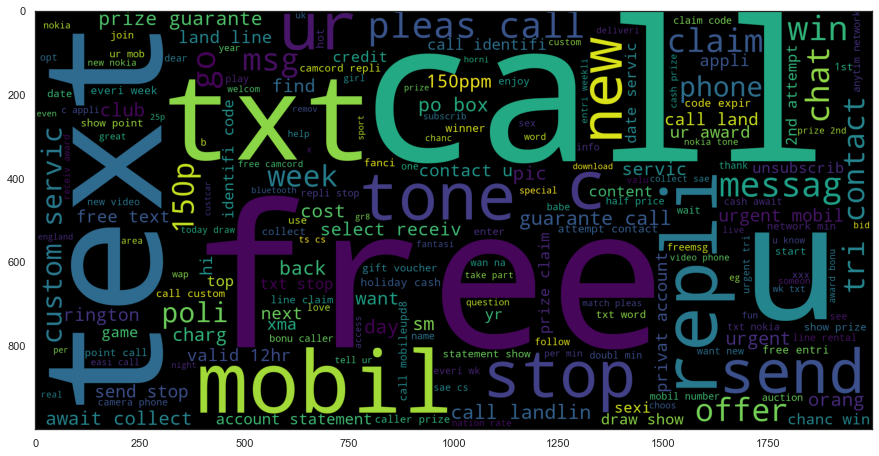

In [202]:
plt.figure(figsize=(15,15))
spam_wc=wc.generate(df[df['Detection']==1]['Email Message'].str.cat(sep=" "))
plt.imshow(spam_wc)
plt.show()

### 4. Top 10 most used words in spam Email Message.

In [203]:
most_used_spam_words=[]

spam_list=df[df['Detection']==1]['Email Message'].tolist()

# accessing each individual elements from spam_list
for sentense in spam_list:
    # accessing each individual word form list elements
    for word in sentense.split():
        most_used_spam_words.append(word)

In [204]:
top_10=pd.DataFrame(Counter(most_used_spam_words).most_common(10))

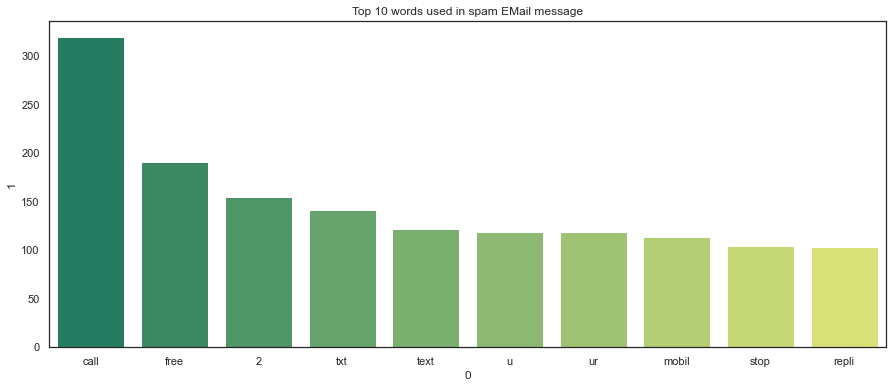

In [205]:
plt.figure(figsize=(15,6))
sns.barplot(x=top_10[0],y=top_10[1],palette="summer")
plt.title("Top 10 words used in spam EMail message")
plt.show()

### 5. Generating WordCloud on tranformed Ham Email Message column

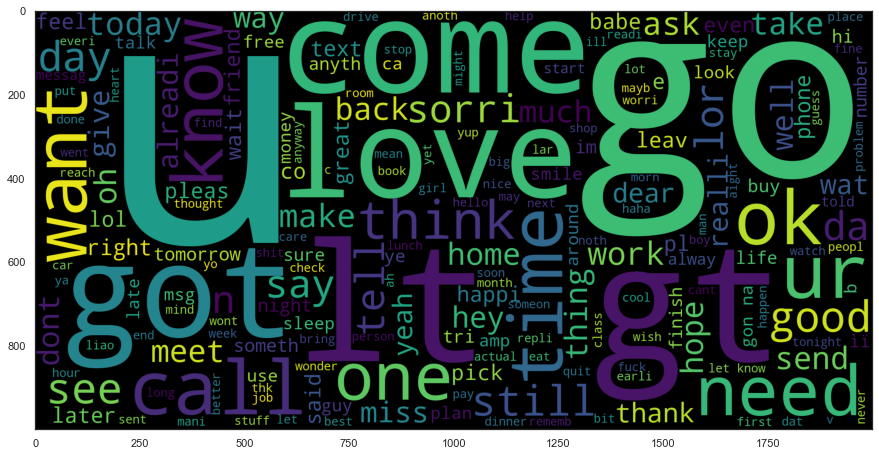

In [206]:
sns.set(style="white")
plt.figure(figsize=(15,15))
spam_wc=wc.generate(df[df['Detection']==0]['Email Message'].str.cat(sep=" "))
plt.imshow(spam_wc)
plt.show()

### 6. Top 10 most used words in Ham Email Message.

In [207]:
most_used_ham_words=[]

ham_list=df[df['Detection']==0]['Email Message'].tolist()

# accessing each individual elements from spam_list
for sentense in ham_list:
    # accessing each individual word form list elements
    for word in sentense.split():
        most_used_ham_words.append(word)

In [208]:
top_10_ham=pd.DataFrame(Counter(most_used_ham_words).most_common(10))

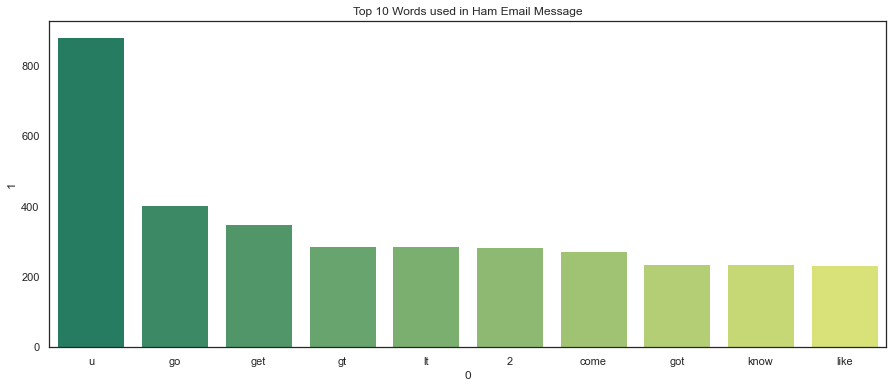

In [209]:
plt.figure(figsize=(15,6))
sns.barplot(x=top_10_ham[0],y=top_10_ham[1],palette="summer")
plt.title("Top 10 Words used in Ham Email Message")
plt.show()

### 7. Converting Email Message text data into numeric using TfidfVectorizer

In [210]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [211]:
tfidf=TfidfVectorizer()

In [212]:
# converting into vectors
x=tfidf.fit_transform(df['Email Message']).toarray()

In [213]:
x.shape

(5169, 6708)

In [214]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [215]:
y=df['Detection'].values

In [216]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [217]:
y.shape

(5169,)

### 8. Splitting Data for Model Training & Testing.

In [218]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [219]:
print("x_train - >  ",x_train.shape)
print("x_test - >  ",x_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test - >  ",y_test.shape)

x_train - >   (4135, 6708)
x_test - >   (1034, 6708)
y_train - >   (4135,)
y_test - >   (1034,)


---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Model Building
</p>
</div>

In [220]:
training_score = []
testing_score = []

In [223]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test,x_test_pred))
    print(f"Recall Score of {model} model is:",recall_score(y_test,x_test_pred))
    print(f"F1 Score of {model} model is:",f1_score(y_test,x_test_pred))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>1. Logistic-Regression </b> Model</h2>

Accuracy_Score of LogisticRegression() model on Training Data is: 96.05804111245465
Accuracy_Score of LogisticRegression() model on Testing Data is: 94.87427466150871

------------------------------------------------------------------------
Precision Score of LogisticRegression() model is: 0.9423076923076923
Recall Score of LogisticRegression() model is: 0.6758620689655173
F1 Score of LogisticRegression() model is: 0.7871485943775101

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


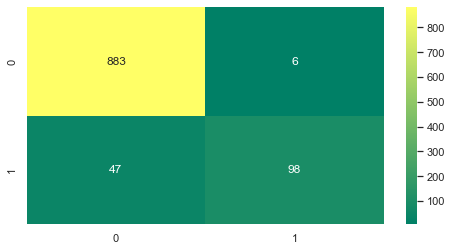

In [224]:
model_prediction(LogisticRegression())

---

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>2. Naive-Bayes </b> Model</h2>

Accuracy_Score of GaussianNB() model on Training Data is: 92.59975816203145
Accuracy_Score of GaussianNB() model on Testing Data is: 86.36363636363636

------------------------------------------------------------------------
Precision Score of GaussianNB() model is: 0.5084033613445378
Recall Score of GaussianNB() model is: 0.8344827586206897
F1 Score of GaussianNB() model is: 0.6318537859007832

------------------------------------------------------------------------
Confusion Matrix of GaussianNB() model is:


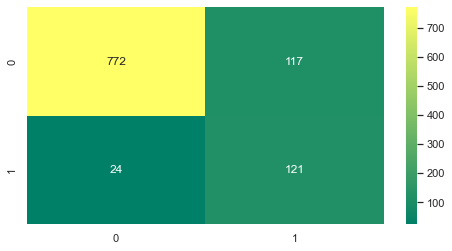

In [225]:
model_prediction(GaussianNB())

---

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>3. Decision-Tree-Classifier </b> Model</h2>

Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 100.0
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 94.77756286266924

------------------------------------------------------------------------
Precision Score of DecisionTreeClassifier() model is: 0.8013245033112583
Recall Score of DecisionTreeClassifier() model is: 0.8344827586206897
F1 Score of DecisionTreeClassifier() model is: 0.8175675675675677

------------------------------------------------------------------------
Confusion Matrix of DecisionTreeClassifier() model is:


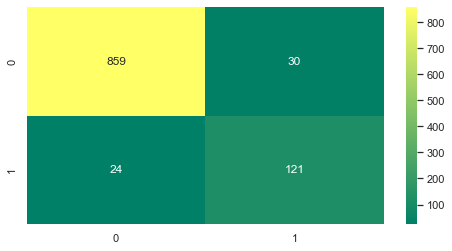

In [226]:
model_prediction(DecisionTreeClassifier())

---

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>4. Random-Forest-Classifier </b> Model</h2>

Accuracy_Score of RandomForestClassifier() model on Training Data is: 100.0
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 96.80851063829788

------------------------------------------------------------------------
Precision Score of RandomForestClassifier() model is: 0.9912280701754386
Recall Score of RandomForestClassifier() model is: 0.7793103448275862
F1 Score of RandomForestClassifier() model is: 0.8725868725868726

------------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier() model is:


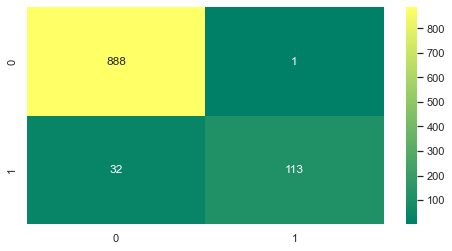

In [227]:
model_prediction(RandomForestClassifier())

---

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>5. Ada-Boost-Classifier </b> Model</h2>

Accuracy_Score of AdaBoostClassifier() model on Training Data is: 97.55743651753326
Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 94.77756286266924

------------------------------------------------------------------------
Precision Score of AdaBoostClassifier() model is: 0.8421052631578947
Recall Score of AdaBoostClassifier() model is: 0.7724137931034483
F1 Score of AdaBoostClassifier() model is: 0.8057553956834532

------------------------------------------------------------------------
Confusion Matrix of AdaBoostClassifier() model is:


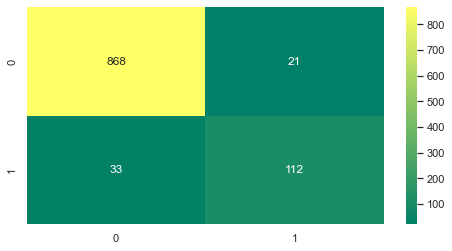

In [228]:
model_prediction(AdaBoostClassifier())

---

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>6. Gradient-Boosting-Classifier </b> Model</h2>

Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 82.053494391717
Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 79.29844738355378

------------------------------------------------------------------------
Precision Score of GradientBoostingClassifier() model is: 0.7721518987341772
Recall Score of GradientBoostingClassifier() model is: 0.8356164383561644
F1 Score of GradientBoostingClassifier() model is: 0.8026315789473685

------------------------------------------------------------------------
Confusion Matrix of GradientBoostingClassifier() model is:


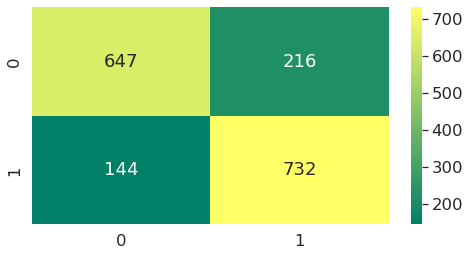

In [89]:
model_prediction(GradientBoostingClassifier())

---

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>7. LGMB Classifier </b> Model</h2>

Accuracy_Score of LGBMClassifier() model on Training Data is: 99.66142684401451
Accuracy_Score of LGBMClassifier() model on Testing Data is: 96.80851063829788

------------------------------------------------------------------------
Precision Score of LGBMClassifier() model is: 0.9375
Recall Score of LGBMClassifier() model is: 0.8275862068965517
F1 Score of LGBMClassifier() model is: 0.8791208791208792

------------------------------------------------------------------------
Confusion Matrix of LGBMClassifier() model is:


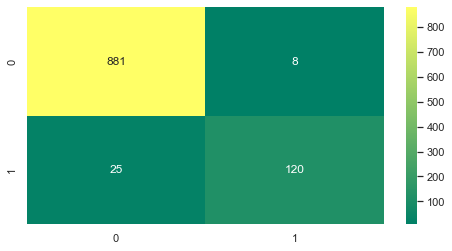

In [229]:
model_prediction(LGBMClassifier())

---

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>8. XGBClassifier </b> Model</h2>

Accuracy_Score of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...) model on Training Data is: 98.96009673518742
Accuracy_Score of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False

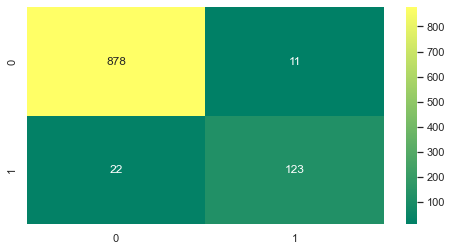

In [230]:
model_prediction(XGBClassifier())

---

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>9. Cat-Boost-Classifier </b> Model</h2>

Accuracy_Score of <catboost.core.CatBoostClassifier object at 0x000001D79117C0D0> model on Training Data is: 98.59733978234583
Accuracy_Score of <catboost.core.CatBoostClassifier object at 0x000001D79117C0D0> model on Testing Data is: 97.1953578336557

------------------------------------------------------------------------
Precision Score of <catboost.core.CatBoostClassifier object at 0x000001D79117C0D0> model is: 0.9915254237288136
Recall Score of <catboost.core.CatBoostClassifier object at 0x000001D79117C0D0> model is: 0.8068965517241379
F1 Score of <catboost.core.CatBoostClassifier object at 0x000001D79117C0D0> model is: 0.8897338403041825

------------------------------------------------------------------------
Confusion Matrix of <catboost.core.CatBoostClassifier object at 0x000001D79117C0D0> model is:


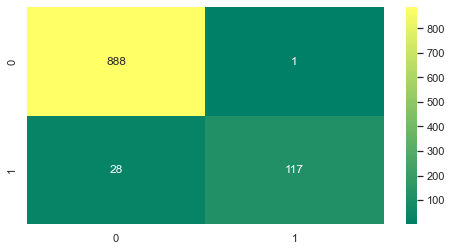

In [231]:
model_prediction(CatBoostClassifier(verbose=False))

***

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
All Model Performance Comparison
</p>
</div>

In [232]:
models = ["Logistic Regression","Naive Bayes","Decision Tree","Random Forest","Ada Boost",
          "Gradient Boost","LGBM","XGBoost","CatBoost"]

In [233]:
df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score})

In [234]:
df

,Algorithms,Training Score,Testing Score
0,Logistic Regression,96.058041,94.874275
1,Naive Bayes,96.058041,94.874275
2,Decision Tree,92.599758,86.363636
3,Random Forest,100.000000,94.777563
4,Ada Boost,100.000000,96.808511
5,Gradient Boost,97.557437,94.777563
6,LGBM,99.661427,96.808511
7,XGBoost,98.960097,96.808511
8,CatBoost,98.597340,97.195358


### Plotting above results using column-bar chart.

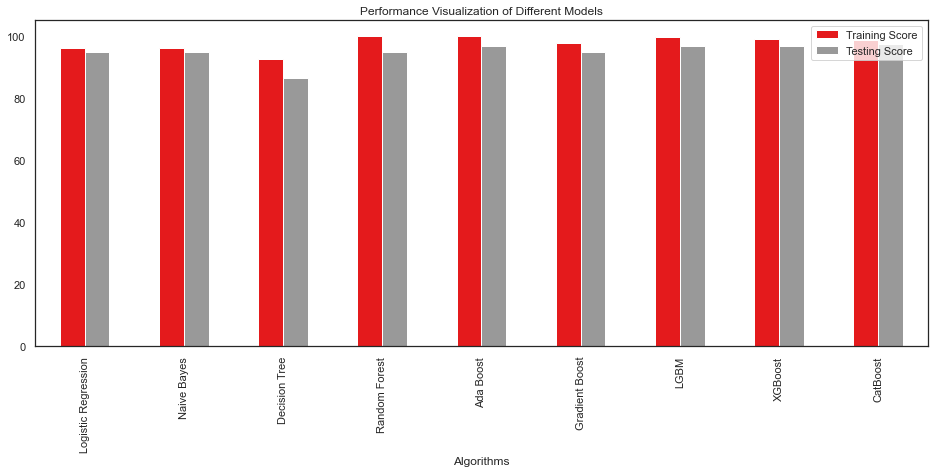

In [235]:
df.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>
💡 Highest performance was give by CatBoost Model around 97%%.<br>
💡 But XgBoost,LGBM & catBoost Model performance was also good.<br>
💡 So we can use catboost Model for spam email detection in future.<br>    
</div>

---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Conclusion
</p>
</div>

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Email Spam Detection using Machine Learning.<br>

<b>Key-Points</b><br>

💡 First I did the basic understanding of data.<br>
💡 Then I did Data Cleaning & EDA.<br>
💡 We were havinng only textural independent feature in the dataset. <br>    
💡 So I have done to text preprocessing & data preprocessing for better model training.<br>
💡 Then I have used different classifiers machine learning techniques for predictions.<br>
💡 Then I  have compared all the preddictions given by different classifier models.<br>
💡 Then I have selected the best performing classifier modles.<br>
</div>

---